# Deep Learning - 2

## 2.7 Practical Example with Mnist Dataset

In [1]:
# Listing 2.1 Loading the MNIST dataset in Keras

    # grayscale images
    # 28 * 28 pixcels
    # 10 classes
    # 60000 training
    # 10000 testing

# import mnist data set from keras
from tensorflow.keras.datasets import mnist

In [2]:
# Listing 2.1 Loading the MNIST dataset in Keras

# split data to training and testing data sets
# data
    # images
    # labels
# train_images and train_labels form the training set,
# test set, test_images and test_labels
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# The images are encoded as Numpy arrays
# labels are an array of digits, ranging from 0 to 9. 
# The images and labels have a one-to-one correspondence.

In [3]:
# training data
print("Shape of training images : ",train_images.shape)
print("Shape of training images labels : ",train_labels.shape)
print("Labels of training images : ",train_labels)

Shape of training images :  (60000, 28, 28)
Shape of training images labels :  (60000,)
Labels of training images :  [5 0 4 ... 5 6 8]


In [4]:
# testing data
print("Shape of test images : ",test_images.shape)
print("Shape of test images labels : ",test_labels.shape)
print("Labels of test images : ",test_labels)

Shape of test images :  (10000, 28, 28)
Shape of test images labels :  (10000,)
Labels of test images :  [7 2 1 ... 4 5 6]


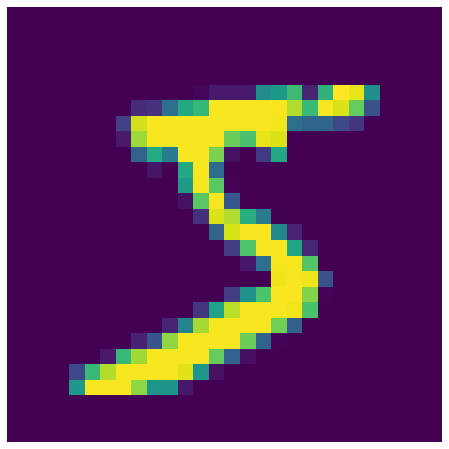

In [5]:
# Check one of the image
import matplotlib.pylab as plt
def plti(im, h=8, **kwargs):
    """
    Helper function to plot an image.
    """
    y = im.shape[0]
    x = im.shape[1]
    w = (y/x) * h
    plt.figure(figsize=(w, h))
    plt.imshow(im, interpolation="none", **kwargs)
    plt.axis('off')
plti(train_images[0])

In [6]:
# Listing 2.2 The network architecture

# import model and layers
from tensorflow import keras
from tensorflow.keras import layers

# Define network and layers
model = keras.Sequential([
    layers.Dense(512,activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [7]:
# Listing 2.3 The compilation step

model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

In [8]:
# Listing 2.4 Preparing the image data

# We need to reshape our data as it is of shape (60000,28,28) 
# on the other hand we need to use this data as initial nodes
# thus data is reshaped to (60000,28*28)
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))
# Initally values are between interval [0,225]
# scale them to be in interval [0,1]
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

In [9]:
# One hot encoding

#       A*  A   B*  B   C   D   F
#   A*  1   0   0   0   0   0   0
#   A   0   1   0   0   0   0   0
#   B*  0   0   1   0   0   0   0
#   B   0   0   0   1   0   0   0
#   C   0   0   0   0   1   0   0
#   D   0   0   0   0   0   1   0
#   F   0   0   0   0   0   0   1

In [10]:
# print(train_labels[0])
# # Not as such required in latest version 
# from tensorflow.keras.utils import to_categorical
# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)
# print(train_labels[0])

In [11]:
# Listing 2.5 “Fitting” the model
# train the model, 
    # we fit the model to its training data.
model.fit(train_images, train_labels, epochs=5, batch_size=128)
# Accuracy and loss is over the training data

Epoch 1/5
469/469 [==============================] - 11s 20ms/step - loss: 0.2554 - accuracy: 0.9262
Epoch 2/5
469/469 [==============================] - 9s 19ms/step - loss: 0.1045 - accuracy: 0.9687
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0688 - accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0492 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0377 - accuracy: 0.9887


In [12]:
# Listing 2.6 Using the model to make predictions

import numpy as np
# Take first 10 images from the test images
test_digits = test_images[0:10]
# predict the model behaviour on the slice of test images
predictions = model.predict(test_digits)
# check predictio of first test digit
print(np.shape(predictions[0]))
# Each prdiction is probability of ten classes
predictions[0]

(10,)


array([2.5061636e-08, 1.8423772e-10, 3.8960752e-06, 9.5133502e-05,
       4.3010400e-12, 2.5220203e-07, 3.5580954e-14, 9.9989963e-01,
       1.5831378e-07, 8.7709481e-07], dtype=float32)

In [13]:
# find index of the higest probability which crosponds to the same label as index
predictions[0].argmax()

7

In [14]:
# higest probability
predictions[0][7]

0.9998996

In [15]:
# Check the label from the test tabels
test_labels[0]

7

In [16]:
# Listing 2.7 Evaluating the model on new data

# compute average accuracy over the entire test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")
print(f"test_loss: {test_loss}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0677 - accuracy: 0.9809
test_acc: 0.98089998960495
test_loss: 0.06767154484987259


In [17]:
# gap between training accuracy and test accuracy is an example of overfitting